**Demonstration of the convolutional functions in extracting features in objects.**


In [56]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow import keras
import datetime
#from tensorflow.keras.models import Sequential
#from tensorflow.keras import layers
#from tensorflow.keras.layers import Activation, Dense
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.metrics import categorical_crossentropy,BinaryCrossentropy,MeanSquaredError,MeanSquaredLogarithmicError,SparseCategoricalAccuracy,sparse_categorical_crossentropy
#from collections.abc import Mapping

In [57]:
# Load the dataset
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [58]:
# Characterization of the data image
print('The shape of dataset :',X_train_full.shape)
print('The number of data is :',X_train_full.shape[0])
print('The shape of the data image is: ',X_train_full[0].shape)
print('The image is represented by numpy array as shown below :','\n',X_train_full[0])

The shape of dataset : (60000, 28, 28)
The number of data is : 60000
The shape of the data image is:  (28, 28)
The image is represented by numpy array as shown below : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0  

A sample image is shown below: 


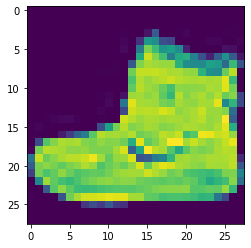

In [59]:
print('A sample image is shown below: ')
plt.imshow(X_train_full[0])

# Illustration of the convolutional functions in edge detection (or extracting features

In [60]:
# Define function to transform image using conv2d/max_pool/activation functions (relu/sigmoil/tanh)

def transform(image,filter, n, m):

  for i in range(0,n):
     fig,ax = plt.subplots(1,11, figsize=(20,20))

     #plot origianl image
     ax[0].imshow(image[0,:,:,0])
     ax[0].set_title(class_names[y_train_full[m]])
     #print(image.shape)

     #perform convolution transformation using filter
     #tf.nn.conv2d API accepts an input tensor with rank at least 4.
     # check for detail https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

     image=tf.nn.conv2d(image, filter, strides=[1, 1, 1,1], padding='SAME') 
     ax[1].imshow(image[0,:,:,0])
     ax[1].set_title('conv1 (1st)')
     #print(image.shape)
     image=tf.nn.conv2d(image, filter, strides=[1, 1, 1,1], padding='SAME')
     ax[2].imshow(image[0,:,:,0])
     ax[2].set_title('conv2 (2nd)')
     #print(image.shape)
     '''
     image=tf.nn.conv2d(image, filter, strides=[1, 1, 1,1], padding='SAME')
     ax[3].imshow(image[0,:,:,0])
     ax[3].set_title('conv3')
     '''

     #perform transformation using activation function and max_pool
     image1_relu=tf.nn.relu(image)
     ax[3].imshow(image1_relu[0,:,:,0])
     ax[3].set_title('relu')

     image2=tf.nn.max_pool(image1_relu,ksize=3,strides=2, padding="SAME")
     ax[4].imshow(image2[0,:,:,0])
     ax[4].set_title('max_pool')


     #perform transformation using activation function and max_pool
     image1_leaky_relu=tf.nn.leaky_relu(image)
     ax[5].imshow(image1_leaky_relu[0,:,:,0])
     ax[5].set_title('leaky_relu')

     image3=tf.nn.max_pool(image1_relu,ksize=3,strides=2, padding="SAME")
     ax[6].imshow(image3[0,:,:,0])
     ax[6].set_title('max_pool')

     #perform transformation using activation function and max_pool
     image1_sigmoid=tf.nn.sigmoid(image)
     ax[7].imshow(image1_sigmoid[0,:,:,0])
     ax[7].set_title('sigmoid')

     image4=tf.nn.max_pool(image1_sigmoid,ksize=3,strides=2, padding="SAME")
     ax[8].imshow(image4[0,:,:,0])
     ax[8].set_title('max_pool')

     #perform transformation using activation function and max_pool
     image1_tanh=tf.nn.tanh(image)
     ax[9].imshow(image1_tanh[0,:,:,0])
     ax[9].set_title('tanh')

     image5=tf.nn.max_pool(image1_tanh,ksize=3,strides=2, padding="SAME")
     ax[10].imshow(image5[0,:,:,0])
     ax[10].set_title('max_pool')


## Extract vertical features

In [61]:
# create a filter to detect vertical features in the object
filter= np.zeros([3,3,1,1])
filter[:,0,:,:]=1
filter[:,2,:,:]=-1
filter= tf.constant(filter, dtype=tf.float32)

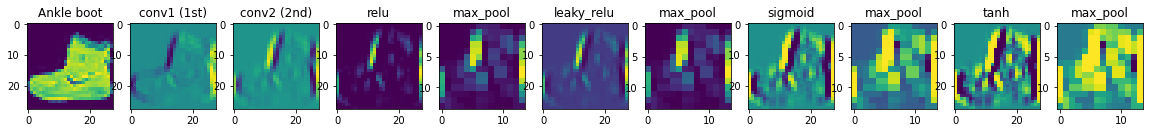

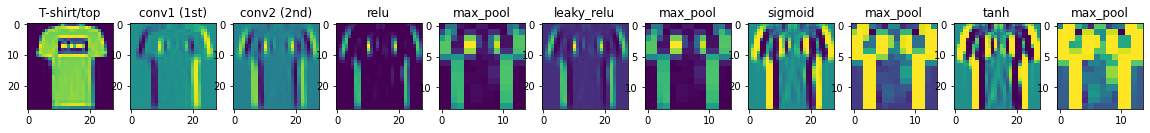

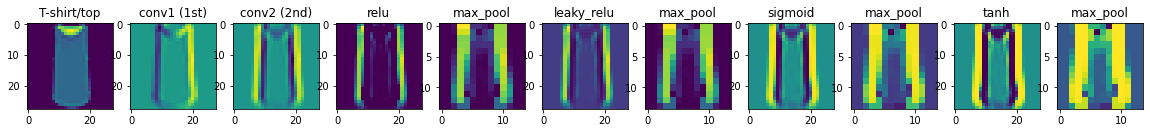

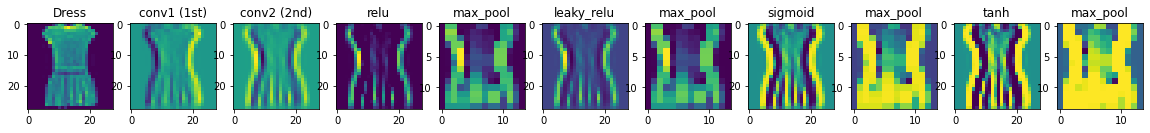

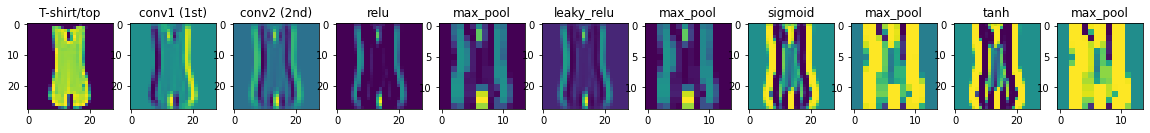

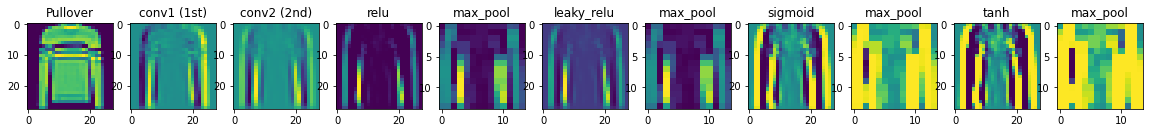

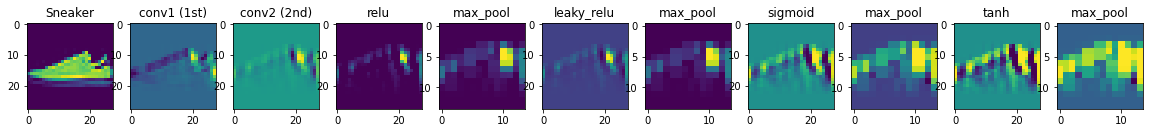

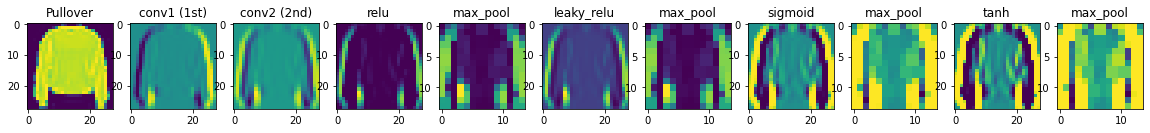

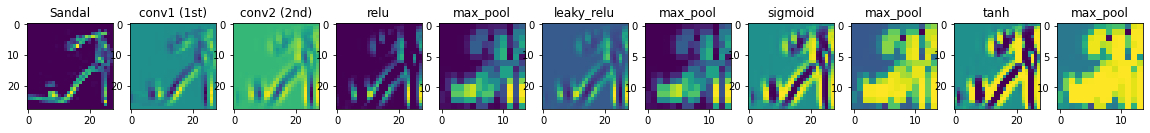

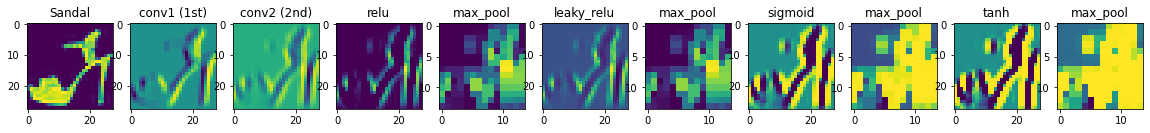

In [62]:
# pre-process image for feeding into tensorflow

for i in range(0,10):
  image=X_train_full[i]
  #print(type(image))
  image=tf.constant(image, dtype=tf.float32)/255
  image=tf.expand_dims(image,-1)
  image=tf.expand_dims(image,0)
  #print(image.shape)
  
  transform(image,filter,n=1,m=i)

**Note that after conv2d transformation, relu/leaky relu are superior to sigmoid/tanh in further hightlighting the features**




## Extract horizontal features



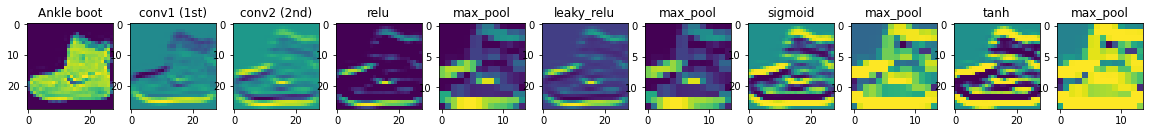

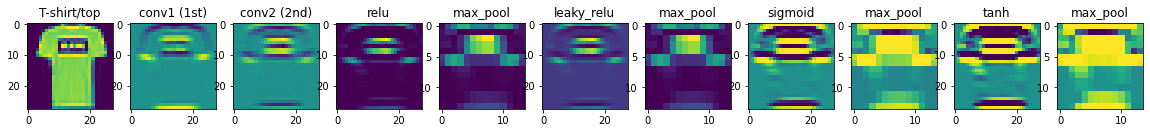

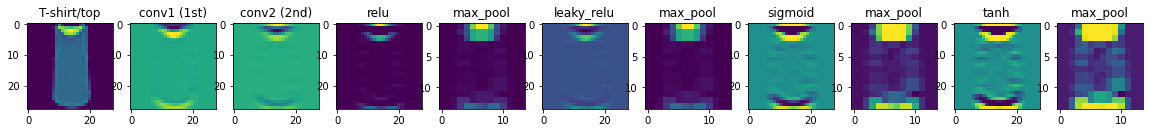

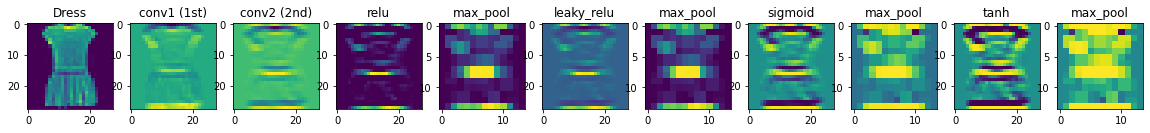

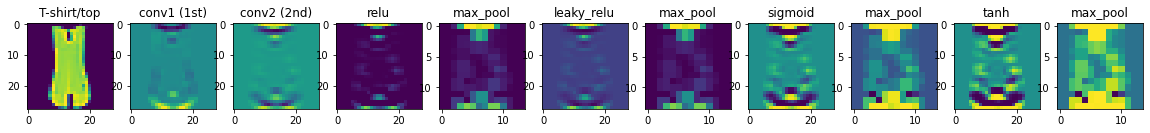

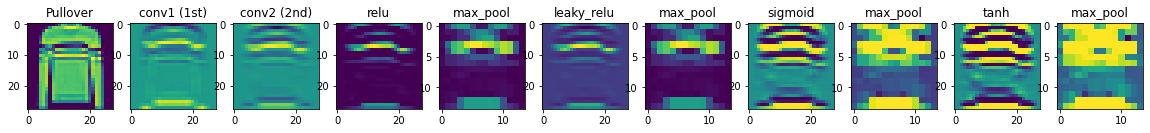

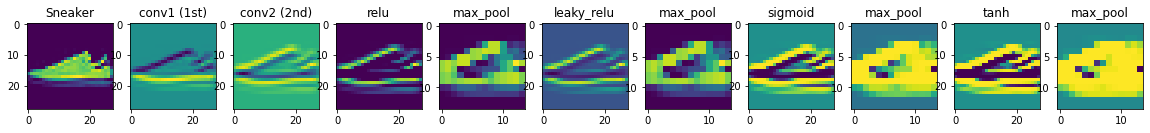

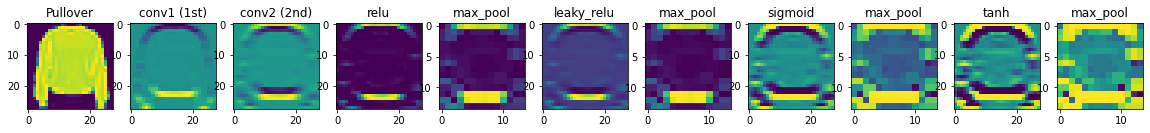

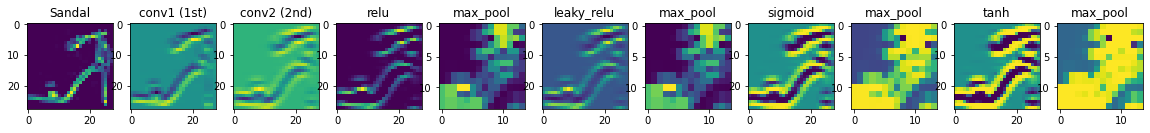

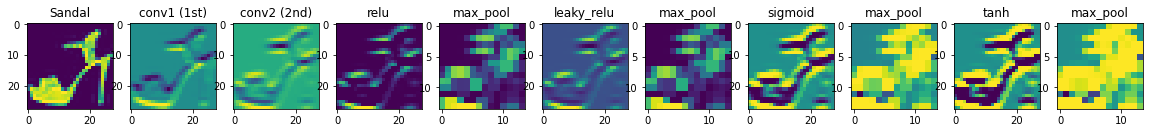

In [63]:
# create a filter to detect horizontal features in the object. Feed images into tensorflow functions
filter= np.zeros([3,3,1,1])
filter[0,:,:,:]=1
filter[2,:,:,:]=-1
filter= tf.constant(filter, dtype=tf.float32)

for i in range(0,10):
  image=X_train_full[i]
  #print(type(image))
  image=tf.constant(image, dtype=tf.float32)/255
  image=tf.expand_dims(image,-1)
  image=tf.expand_dims(image,0)
  #print(image.shape)
  
  transform(image,filter,n=1,m=i)